In [2]:
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier

from sklearn.metrics import *
from sklearn.model_selection import *
import numpy as np


from imblearn.over_sampling import SMOTE

READ DATABASE

In [3]:
database=pd.read_csv('/content/dataset.csv')

# DATA VISUALIZATION

In [4]:
print(type(database))

<class 'pandas.core.frame.DataFrame'>


In [5]:
print(database.shape)

(43400, 12)


In [6]:
database.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


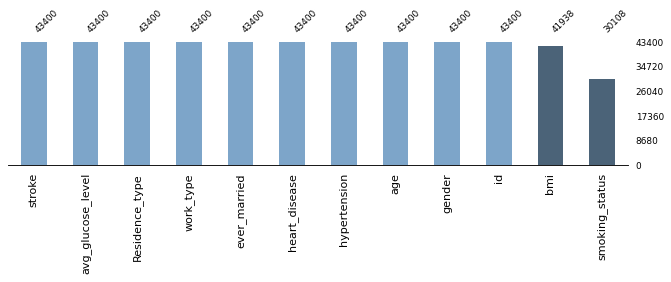

In [7]:
##import missingno as msno
A= '#7DA5C9'

color = [A, A, A, A, A, A, A, A, A, A,'#4B6378','#4B6378']
fig, ax = plt.subplots(figsize=(10, 2), dpi=80)
fig.patch.set_facecolor('#ffffff')
ax.set_facecolor('#ffffff')
msno.bar(database, sort='descending', color=color, ax=ax, fontsize=8, labels='off', filter='top')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', size=10, weight='normal',  alpha=1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)
plt.show()

In [8]:
database.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [9]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [10]:
database[['bmi']]

,bmi
0,18.0
1,39.2
2,17.6
3,35.9
4,19.1
...,...
43395,20.4
43396,55.4
43397,28.9
43398,33.2


# Imputing in BMI

In [11]:
impute = SimpleImputer(missing_values=np.NaN, strategy='mean')

impute.fit(database[['bmi']])

database['bmi'] = impute.transform(database[['bmi']])

In [12]:
database.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64

# removing ID coloum


In [13]:
database=database.drop(['id'],axis=1)


In [14]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                43400 non-null  float64
 9   smoking_status     30108 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


In [15]:
database.shape

(43400, 11)

In [16]:
database.describe()  # need to know

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,43.111751,7.638023,0.133103
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.400000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.600000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [17]:
database.duplicated().sum()

0

In [18]:
database.count()

gender               43400
age                  43400
hypertension         43400
heart_disease        43400
ever_married         43400
work_type            43400
Residence_type       43400
avg_glucose_level    43400
bmi                  43400
smoking_status       30108
stroke               43400
dtype: int64

# CARAGORICAL FEATURES


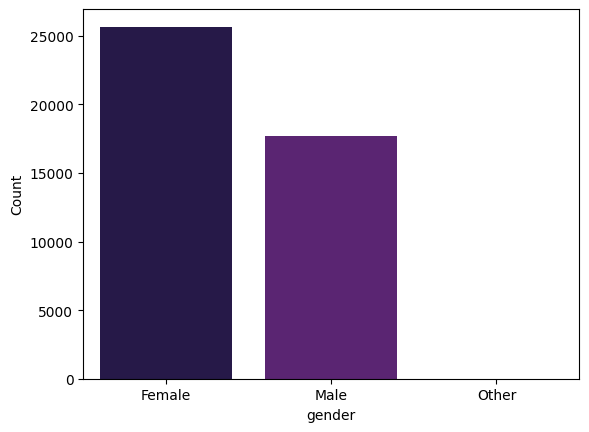

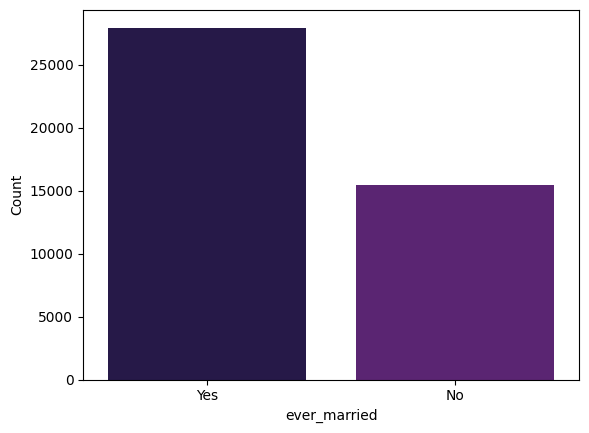

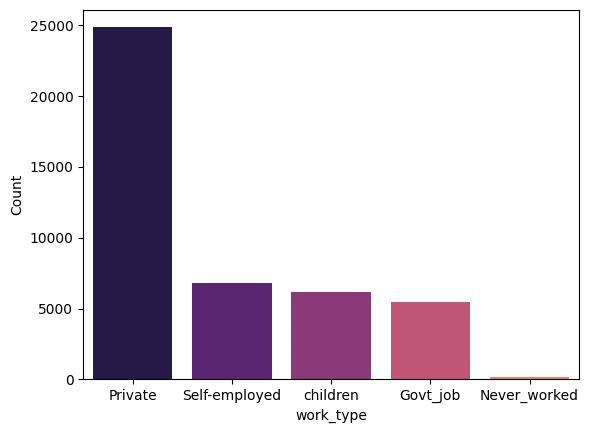

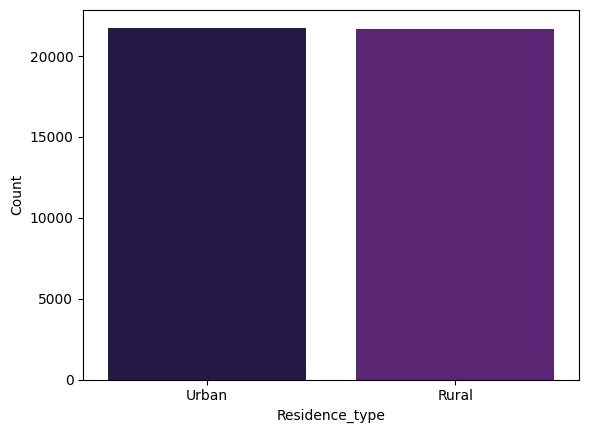

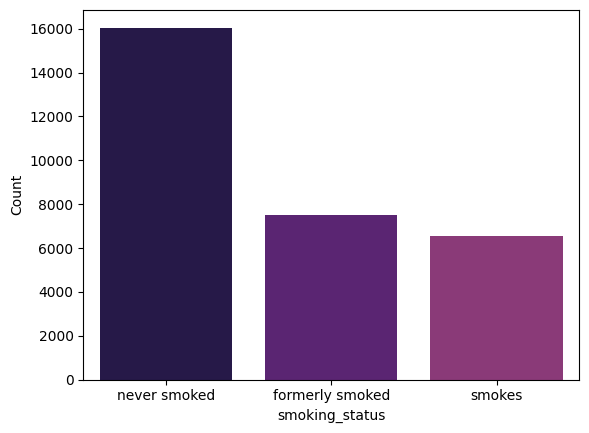

In [19]:
category_cols = database.select_dtypes(include=['object'])
sns.set_palette('magma')
for col in category_cols:
    sns.countplot(data=database, x=col, order=database[col].value_counts().index)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Feature Engineering

In [20]:
database['work_type'].unique()


array(['children', 'Private', 'Never_worked', 'Self-employed', 'Govt_job'],
      dtype=object)

In [21]:
database['work_type'].value_counts()

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64

In [22]:
database = pd.get_dummies(database,columns=["work_type"])  #binary te ney

In [23]:
database['gender'].unique()


array(['Male', 'Female', 'Other'], dtype=object)

In [24]:
database["gender"]=database["gender"].map({"Male":1,"Female":0})

In [25]:
database['gender'].head()

0    1.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: gender, dtype: float64

In [26]:
database.count()

gender                     43389
age                        43400
hypertension               43400
heart_disease              43400
ever_married               43400
Residence_type             43400
avg_glucose_level          43400
bmi                        43400
smoking_status             30108
stroke                     43400
work_type_Govt_job         43400
work_type_Never_worked     43400
work_type_Private          43400
work_type_Self-employed    43400
work_type_children         43400
dtype: int64

In [27]:
database['gender'].mean()

0.40849063126598906

In [28]:
database["gender"]=database["gender"].fillna(database["gender"].mean())

#database["gender"].fillna(database["gender"].mean(), inplace=True)

In [29]:
database['ever_married'].unique()

array(['No', 'Yes'], dtype=object)

In [30]:
database["ever_married"]=database["ever_married"].map({"Yes":1,"No":0})

In [31]:
database['Residence_type'].unique()

array(['Rural', 'Urban'], dtype=object)

In [32]:
database["Residence_type"]=database["Residence_type"].map({"Urban":1,"Rural":0})

In [33]:
database['smoking_status'].unique()

array([nan, 'never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [34]:
database = pd.get_dummies(database,columns=["smoking_status"])

In [35]:
database.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.0,3.0,0,0,0,0,95.12,18.0,0,0,0,0,0,1,0,0,0
1,1.0,58.0,1,0,1,1,87.96,39.2,0,0,0,1,0,0,0,1,0
2,0.0,8.0,0,0,0,1,110.89,17.6,0,0,0,1,0,0,0,0,0
3,0.0,70.0,0,0,1,0,69.04,35.9,0,0,0,1,0,0,1,0,0
4,1.0,14.0,0,0,0,0,161.28,19.1,0,0,1,0,0,0,0,0,0


In [36]:
database.count()

gender                            43400
age                               43400
hypertension                      43400
heart_disease                     43400
ever_married                      43400
Residence_type                    43400
avg_glucose_level                 43400
bmi                               43400
stroke                            43400
work_type_Govt_job                43400
work_type_Never_worked            43400
work_type_Private                 43400
work_type_Self-employed           43400
work_type_children                43400
smoking_status_formerly smoked    43400
smoking_status_never smoked       43400
smoking_status_smokes             43400
dtype: int64

### SELECTION


In [37]:
import seaborn as sns
correlation=database.corr()
correlation

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
gender,1.000000,-0.027674,0.024004,0.082353,-0.031068,0.001586,0.035813,-0.021551,0.011324,-0.013503,0.002720,-0.052077,-0.002823,0.089108,0.038655,-0.104262,0.026159
age,-0.027674,1.000000,0.272169,0.250188,0.693070,0.001299,0.237627,0.352236,0.156049,0.115651,-0.069509,0.143657,0.326913,-0.641240,0.244646,0.113898,0.080043
hypertension,0.024004,0.272169,1.000000,0.119777,0.176575,-0.003124,0.160211,0.153779,0.075332,0.020065,-0.019319,0.007236,0.100243,-0.130171,0.071775,0.040298,0.026940
heart_disease,0.082353,0.250188,0.119777,1.000000,0.128833,-0.002743,0.146938,0.054133,0.113763,-0.002441,-0.014292,-0.006327,0.099342,-0.089559,0.083395,-0.035606,0.034839
ever_married,-0.031068,0.693070,0.176575,0.128833,1.000000,0.004422,0.153607,0.337517,0.071920,0.135298,-0.080734,0.158857,0.199305,-0.546495,0.172053,0.103365,0.104869
Residence_type,0.001586,0.001299,-0.003124,-0.002743,0.004422,1.000000,0.000014,-0.003685,0.002247,-0.000142,0.003089,0.006050,-0.007136,-0.001578,-0.004288,0.000075,0.008687
avg_glucose_level,0.035813,0.237627,0.160211,0.146938,0.153607,0.000014,1.000000,0.184199,0.078917,0.023014,-0.014516,0.008048,0.080246,-0.114174,0.075054,0.012246,0.025871
bmi,-0.021551,0.352236,0.153779,0.054133,0.337517,-0.003685,0.184199,1.000000,0.018407,0.093567,-0.021608,0.200884,0.081757,-0.454870,0.119270,0.116958,0.071319
stroke,0.011324,0.156049,0.075332,0.113763,0.071920,0.002247,0.078917,0.018407,1.000000,-0.004782,-0.008674,-0.002464,0.061195,-0.054115,0.039306,-0.002015,0.007061
work_type_Govt_job,-0.013503,0.115651,0.020065,-0.002441,0.135298,-0.000142,0.023014,0.093567,-0.004782,1.000000,-0.024225,-0.437825,-0.163074,-0.153907,0.027947,0.040191,0.027483


<Axes: >

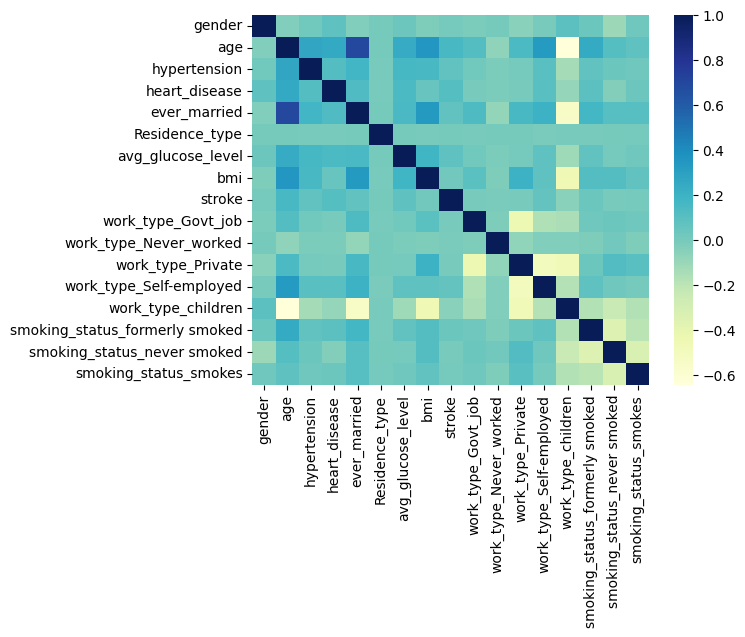

In [38]:
sns.heatmap(correlation, cmap = 'YlGnBu')

# Spliting


In [39]:
print("Keys of dataset:\n", database.keys())

Keys of dataset:
 Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')


In [40]:
y=database["stroke"]
X=database.drop(["stroke"],axis=1)

In [41]:
X.keys()

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=0, stratify = y)

In [43]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (30380, 16)
y_train shape: (30380,)


In [44]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (13020, 16)
y_test shape: (13020,)


In [45]:
import pandas as pd
stroke_dataframe = pd.DataFrame(X_train, columns=X.keys())


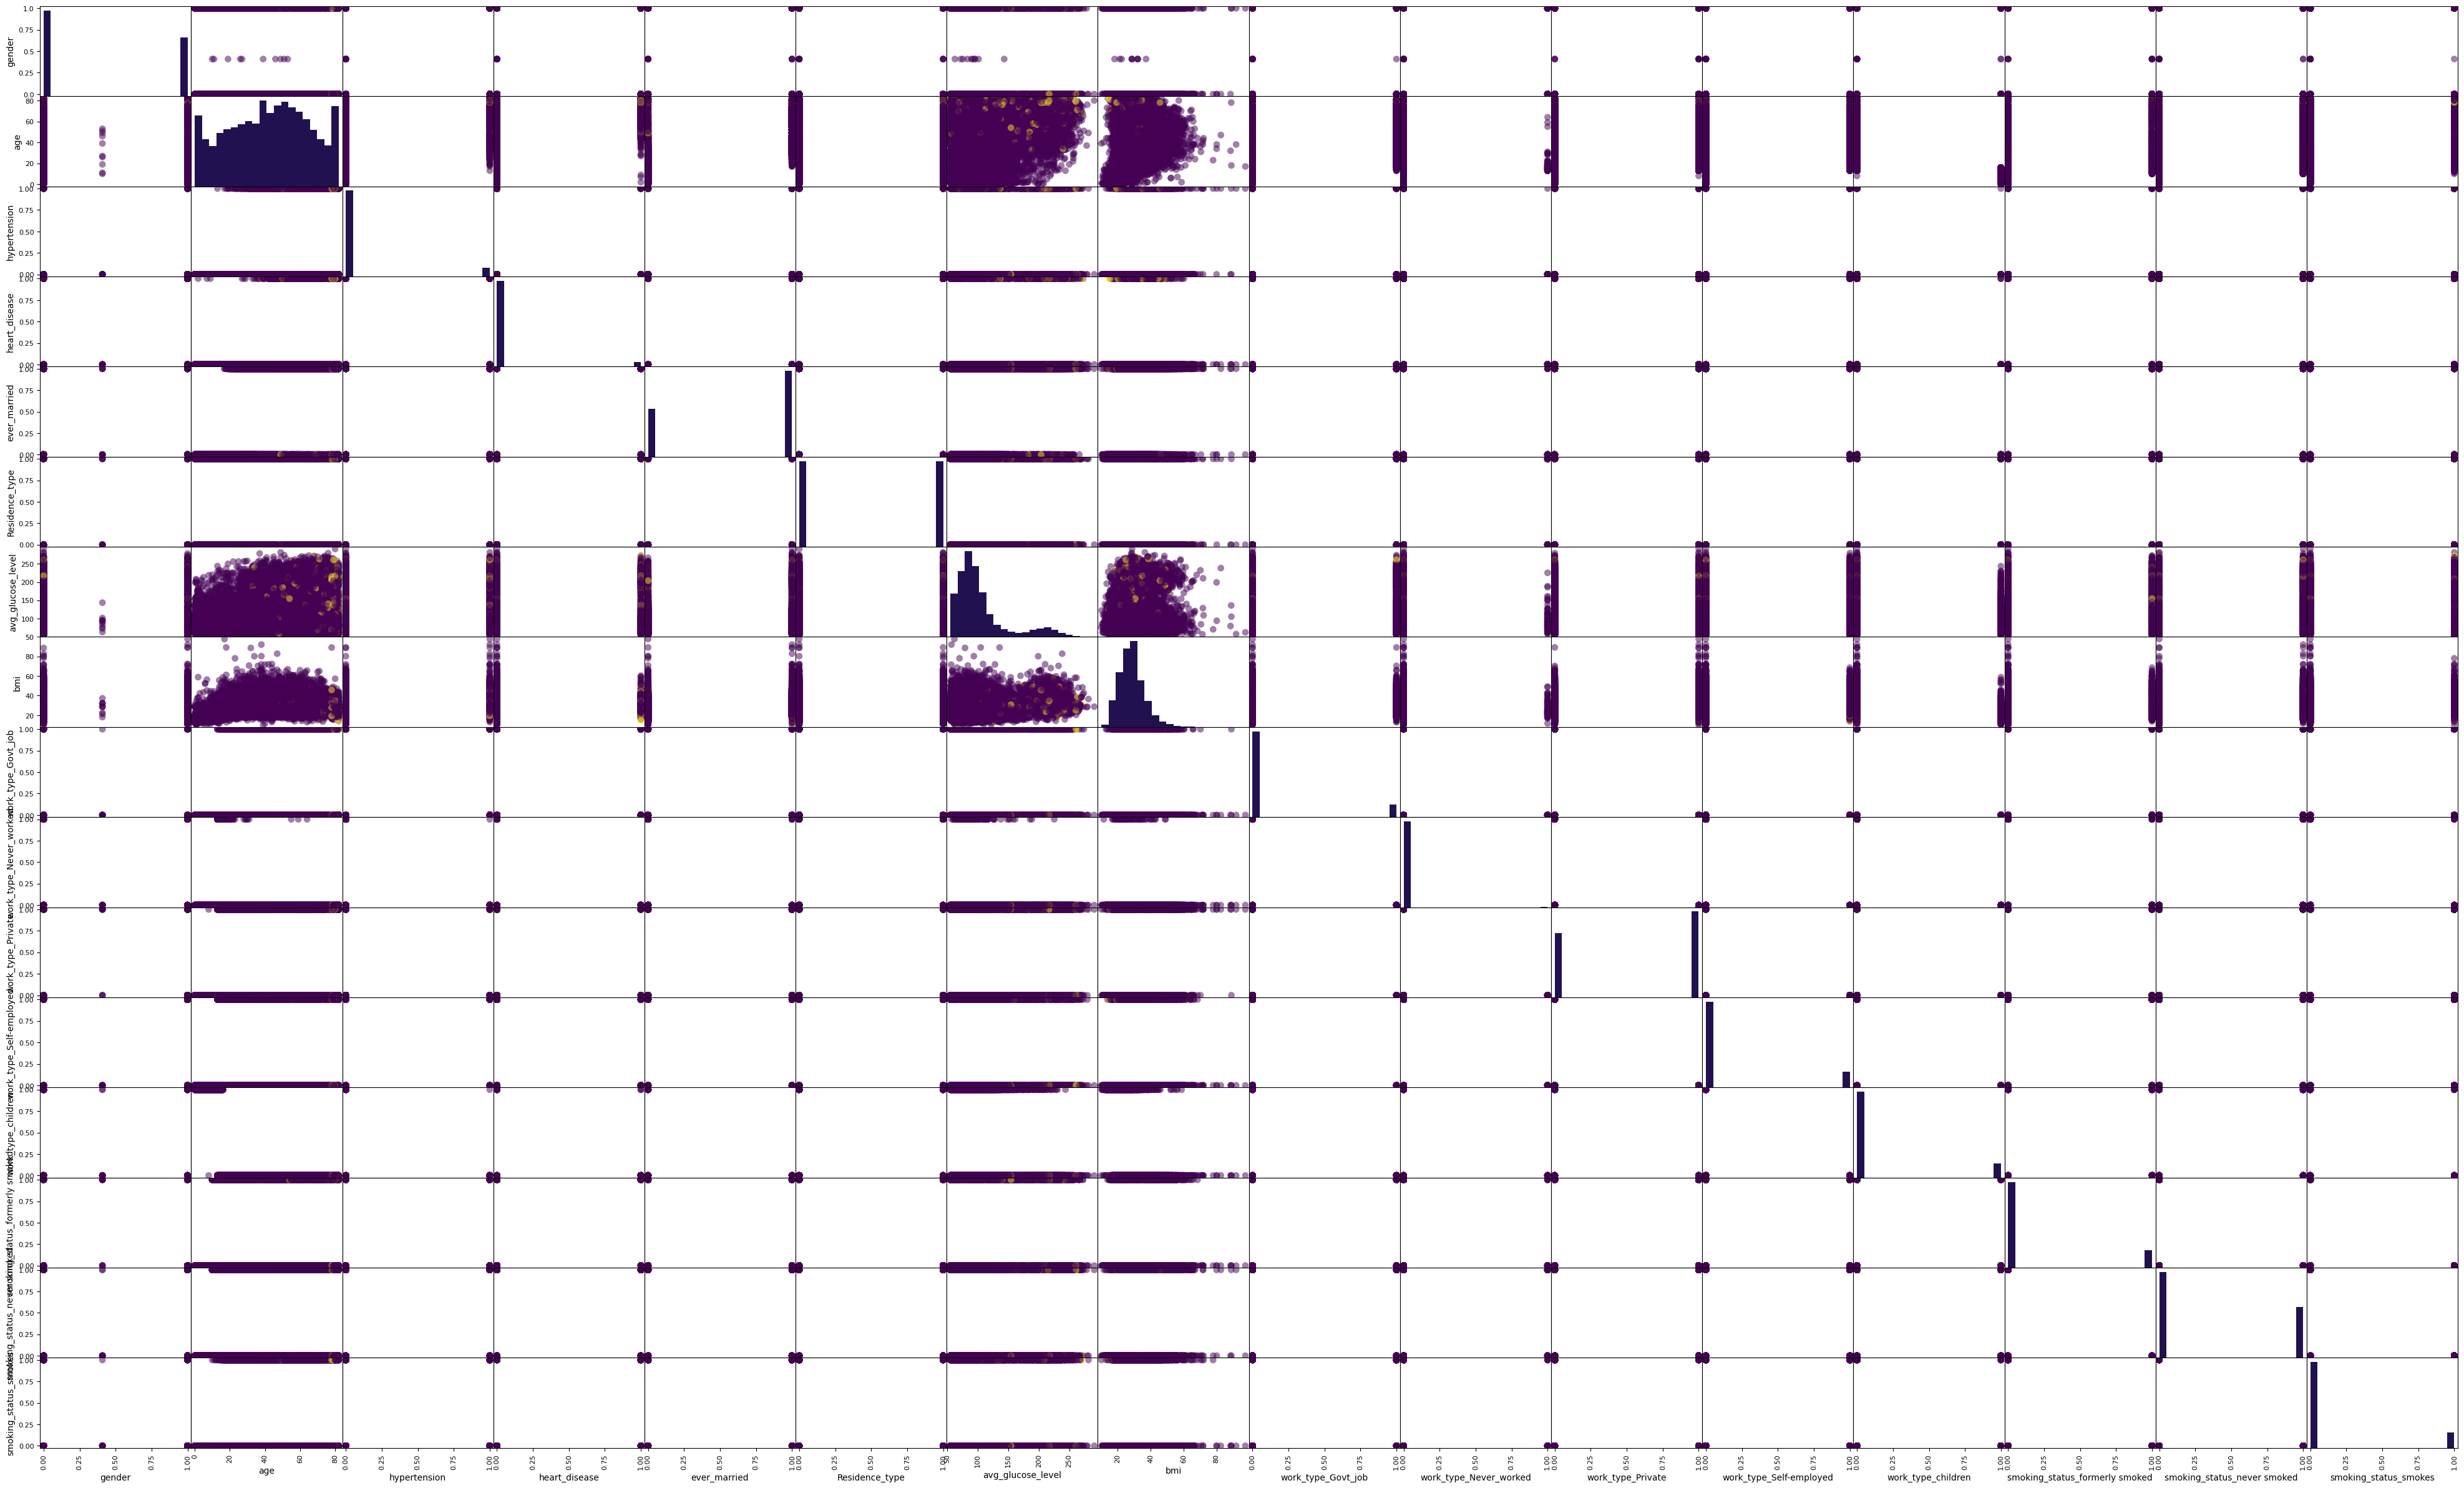

In [46]:
import matplotlib.pyplot as plt
scatter_matrix = pd.plotting.scatter_matrix(stroke_dataframe, c=y_train, figsize=(50, 30),
                                           marker='o', hist_kwds={'bins': 20}, s=60,
                                           alpha=.5)


plt.show()


Text(0, 0.5, 'no of strokes')

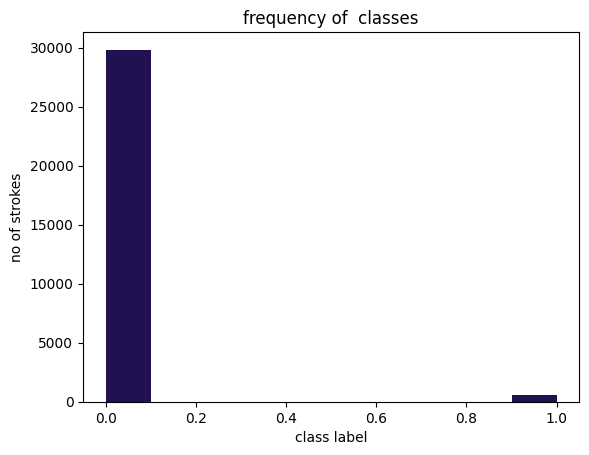

In [47]:
fig,ax = plt.subplots()
ax.hist(y_train)
ax.set_title('frequency of  classes')
ax.set_xlabel('class label')
ax.set_ylabel('no of strokes')

# SCALING


In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [49]:
X_train_scaled = scaler.transform(X_train)

In [50]:
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))

per-feature minimum before scaling:
 gender                             0.00
age                                0.08
hypertension                       0.00
heart_disease                      0.00
ever_married                       0.00
Residence_type                     0.00
avg_glucose_level                 55.00
bmi                               10.10
work_type_Govt_job                 0.00
work_type_Never_worked             0.00
work_type_Private                  0.00
work_type_Self-employed            0.00
work_type_children                 0.00
smoking_status_formerly smoked     0.00
smoking_status_never smoked        0.00
smoking_status_smokes              0.00
dtype: float64
per-feature maximum before scaling:
 gender                              1.00
age                                82.00
hypertension                        1.00
heart_disease                       1.00
ever_married                        1.00
Residence_type                      1.00
avg_glucose_level        

In [51]:
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [52]:
X_test_scaled = scaler.transform(X_test)



In [53]:
print("per-feature minimum before scaling:\n {}".format(X_test.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_test.max(axis=0)))

per-feature minimum before scaling:
 gender                             0.00
age                                0.08
hypertension                       0.00
heart_disease                      0.00
ever_married                       0.00
Residence_type                     0.00
avg_glucose_level                 55.01
bmi                               10.30
work_type_Govt_job                 0.00
work_type_Never_worked             0.00
work_type_Private                  0.00
work_type_Self-employed            0.00
work_type_children                 0.00
smoking_status_formerly smoked     0.00
smoking_status_never smoked        0.00
smoking_status_smokes              0.00
dtype: float64
per-feature maximum before scaling:
 gender                              1.00
age                                82.00
hypertension                        1.00
heart_disease                       1.00
ever_married                        1.00
Residence_type                      1.00
avg_glucose_level        

In [54]:
print("per-feature minimum after scaling:\n {}".format(
    X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.23639060e-05 2.28571429e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
per-feature maximum after scaling:
 [1.         1.         1.         1.         1.         1.
 0.95818682 0.98285714 1.         1.         1.         1.
 1.         1.         1.         1.        ]


#EFFECT OF USING MinMax Scalar

min max_feature scaling

In [56]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=0, stratify = y)

knn=KNeighborsClassifier()

knn.fit(X_train, y_train)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)
#train
knn.fit(X_train_scaled, y_train)
print("Scaled test set accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.98


#cross validation

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *



# Decision Tree
model2 = DecisionTreeClassifier()
dt_accuracy = cross_val_score(model2, X, y, cv=10, scoring='accuracy').mean()
print("Decision Tree Accuracy:", dt_accuracy)

# Random Forest
model4 = RandomForestClassifier()
rf_accuracy = cross_val_score(model4, X, y, cv=10, scoring='accuracy').mean()
print("Random Forest Accuracy:", rf_accuracy)

# Gradient Boosting
model3 = GradientBoostingClassifier()
gb_accuracy = cross_val_score(model3, X, y, cv=10, scoring='accuracy').mean()
print("Gradient Boosting Accuracy:", gb_accuracy)

# K-Nearest Neighbors
model5 = KNeighborsClassifier()
knn_accuracy = cross_val_score(model5, X, y, cv=10, scoring='accuracy').mean()
print("K-Nearest Neighbors Accuracy:", knn_accuracy)

# Logistic Regression
model1 = LogisticRegression(solver="liblinear")
lr_accuracy = cross_val_score(model1, X, y, cv=10, scoring='accuracy').mean()
print("Logistic Regression Accuracy:", lr_accuracy)



# Voting Classifier
model6 = VotingClassifier(estimators=[("lr", model1), ("dtf", model2), ("rf", model4),
                                      ("gb", model3), ("knn", model5)], voting="soft")
vc_accuracy = cross_val_score(model6, X, y, cv=10, scoring='accuracy').mean()
print("Voting Classifier Accuracy:", vc_accuracy)




Decision Tree Accuracy: 0.9605529953917051
Random Forest Accuracy: 0.9818202764976958
Gradient Boosting Accuracy: 0.9814746543778803
K-Nearest Neighbors Accuracy: 0.9815898617511521
Logistic Regression Accuracy: 0.9819585253456221
Voting Classifier Accuracy: 0.9819585253456221


**SMOTE for Imbalanced Classification**   not sure how it works

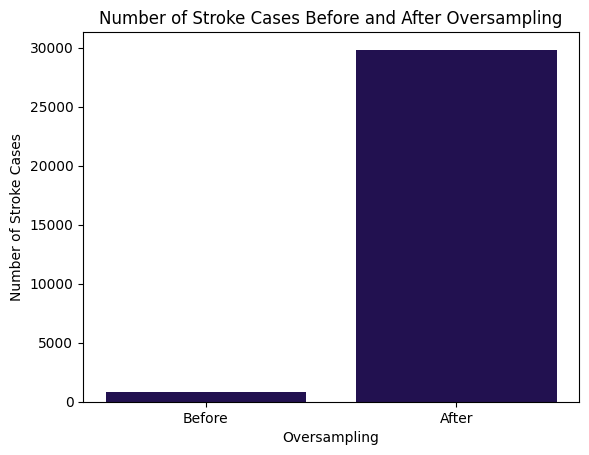

In [58]:
from imblearn.over_sampling import SMOTE
y=database["stroke"]
X=database.drop(["stroke"],axis=1)
smote=SMOTE()
X_train,y_train=smote.fit_resample(X_train,y_train)
num_stroke_before = y.sum()
num_stroke_after = y_train.sum()

plt.bar(['Before', 'After'], [num_stroke_before, num_stroke_after])
plt.title('Number of Stroke Cases Before and After Oversampling')
plt.xlabel('Oversampling')
plt.ylabel('Number of Stroke Cases')
plt.show()

In [59]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

###################################

# **Logistic regression**

In [60]:
from sklearn.metrics import accuracy_score
model_1=LogisticRegression(solver='liblinear')
model_1.fit(X_train,y_train)
y_hat=model_1.predict(X_test)
v = accuracy_score(y_test,y_hat)
val1= v
print('Logistic Regression :',v*100,"%")


Logistic Regression : 89.10906298003071 %


In [62]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     12785
           1       0.06      0.32      0.10       235

    accuracy                           0.89     13020
   macro avg       0.52      0.61      0.52     13020
weighted avg       0.97      0.89      0.93     13020



[[11527   160]
 [ 1258    75]]


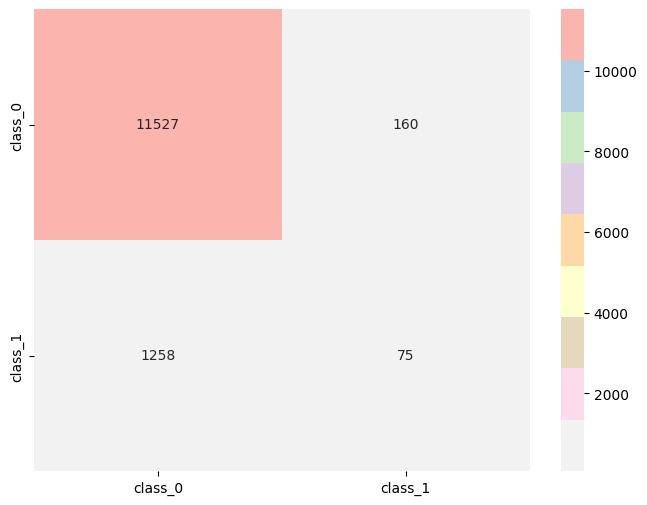

In [61]:
predictions = model_1.predict(X_test)
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)
from seaborn import heatmap


plt.figure(figsize=(8, 6))
sns.heatmap(mat, cmap="Pastel1_r", xticklabels=['class_0', 'class_1'], yticklabels=['class_0', 'class_1'], annot=True, fmt="d")

plt.show()

# RandomForestClassifier

In [63]:
model_4= RandomForestClassifier()
model_4.fit(X_train,y_train)
y_hat=model_4.predict(X_test)
v = accuracy_score(y_test,y_hat)
val4 = v
print('RandomForestClassifier:',v*100,"%")

RandomForestClassifier: 97.51920122887864 %


In [64]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     12785
           1       0.08      0.04      0.05       235

    accuracy                           0.98     13020
   macro avg       0.53      0.52      0.52     13020
weighted avg       0.97      0.98      0.97     13020



[[12688   226]
 [   97     9]]


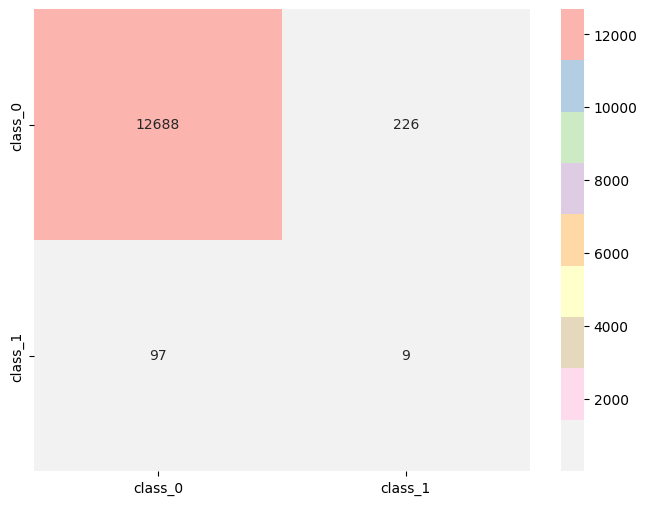

In [65]:
predictions = model_4.predict(X_test)
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)
from seaborn import heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True,fmt="d")
plt.show()

# **KnnClassifier**

In [66]:
model_3= KNeighborsClassifier(n_neighbors = 5)
model_3.fit(X_train,y_train)
y_hat=model_3.predict(X_test)

In [67]:
v = accuracy_score(y_test,y_hat)
val2=v
print('KNN :',v*100,"%")

KNN : 84.83870967741936 %


In [68]:
print(classification_report(y_test,y_hat))


              precision    recall  f1-score   support

           0       0.99      0.86      0.92     12785
           1       0.05      0.38      0.08       235

    accuracy                           0.85     13020
   macro avg       0.52      0.62      0.50     13020
weighted avg       0.97      0.85      0.90     13020



[[10956   145]
 [ 1829    90]]


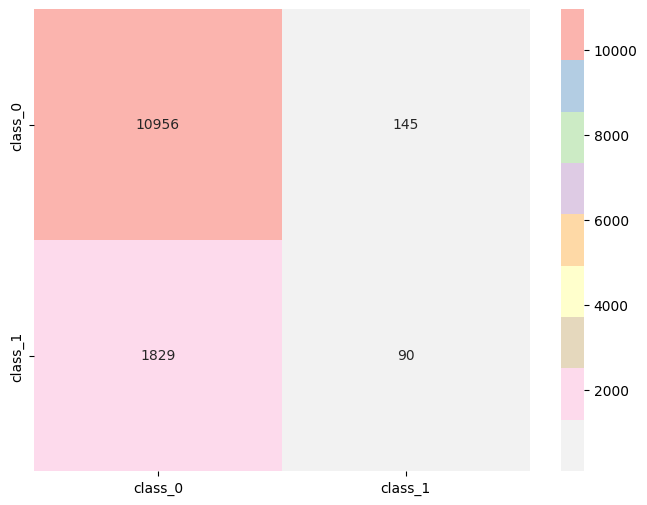

In [69]:
predictions = model_3.predict(X_test)
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)
from seaborn import heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mat, cmap="Pastel1_r", xticklabels=['class_0', 'class_1'], yticklabels=['class_0', 'class_1'], annot=True, fmt="d")

plt.show()

# Gradint Boosting

In [70]:
model_2= GradientBoostingClassifier()
model_2.fit(X_train,y_train)
y_hat=model_2.predict(X_test)

v = accuracy_score(y_test,y_hat)
val5 =v
print('GradientBoosting :',v*100,"%")

GradientBoosting : 93.0952380952381 %


In [71]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     12785
           1       0.07      0.21      0.10       235

    accuracy                           0.93     13020
   macro avg       0.53      0.58      0.53     13020
weighted avg       0.97      0.93      0.95     13020



[[12071   185]
 [  714    50]]


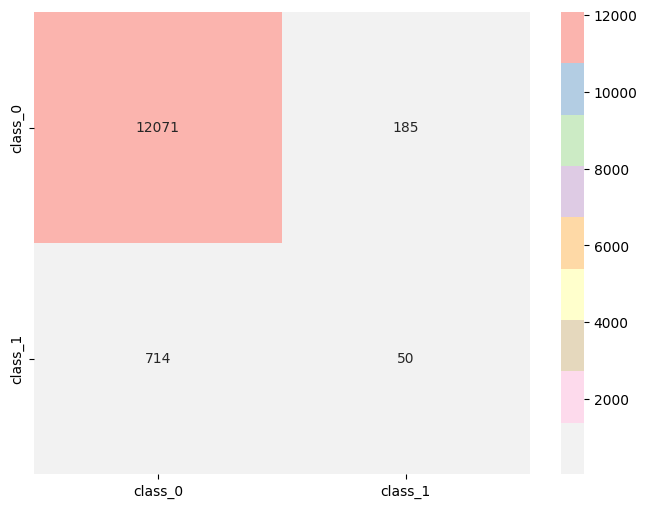

In [72]:
predictions = model_2.predict(X_test)
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)
from seaborn import heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mat, cmap="Pastel1_r", xticklabels=['class_0', 'class_1'], yticklabels=['class_0', 'class_1'], annot=True, fmt="d")

plt.show()

# DecisionTree

In [73]:
model_5= DecisionTreeClassifier()
model_5.fit(X_train,y_train)
y_hat=model_5.predict(X_test)


v = accuracy_score(y_test,y_hat)
val3=v
print('KNN :',v*100,"%")

KNN : 95.19969278033794 %


In [74]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     12785
           1       0.06      0.11      0.08       235

    accuracy                           0.95     13020
   macro avg       0.52      0.54      0.53     13020
weighted avg       0.97      0.95      0.96     13020



[[12368   208]
 [  417    27]]


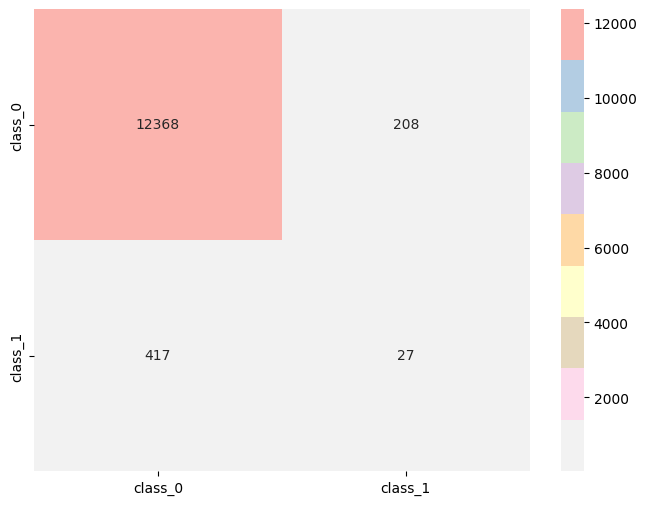

In [75]:
predictions = model_5.predict(X_test)
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)
from seaborn import heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mat, cmap="Pastel1_r", xticklabels=['class_0', 'class_1'], yticklabels=['class_0', 'class_1'], annot=True, fmt="d")

plt.show()

# Graphs


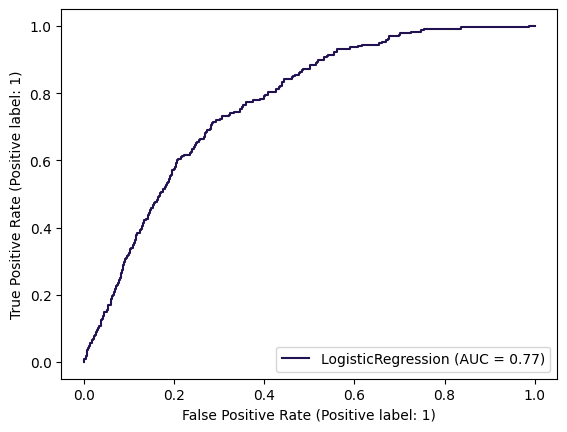

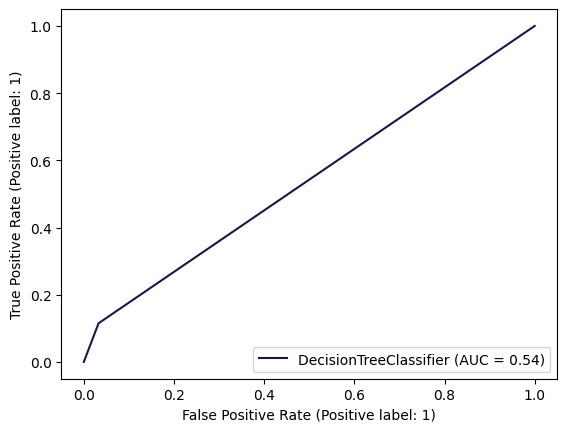

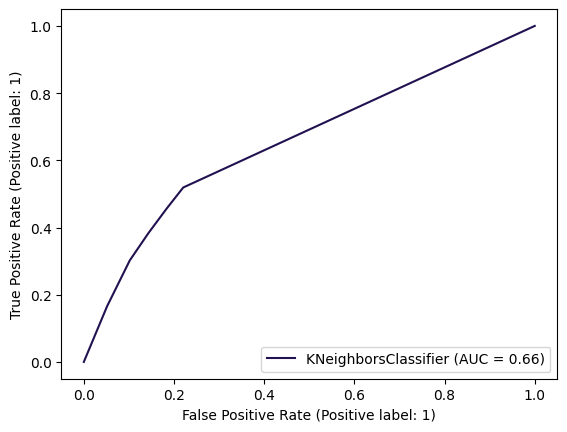

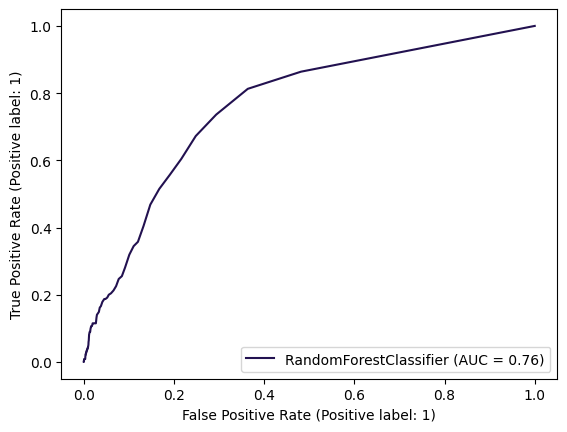

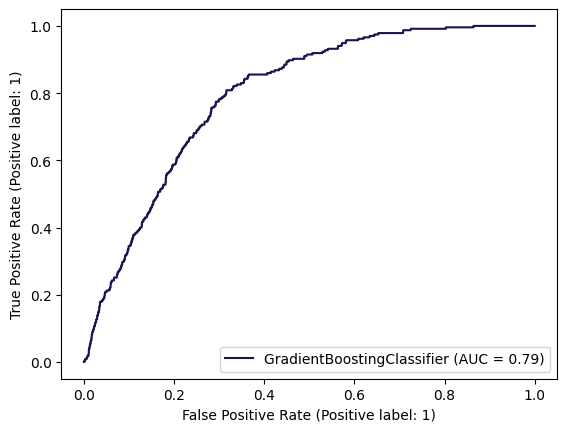

In [76]:
RocCurveDisplay.from_estimator(model_1,X_test,y_test)
RocCurveDisplay.from_estimator(model_5,X_test,y_test)
RocCurveDisplay.from_estimator(model_3,X_test,y_test)
RocCurveDisplay.from_estimator(model_4,X_test,y_test)
RocCurveDisplay.from_estimator(model_2,X_test,y_test)

#CHECK ERROR  QUALITY

In [77]:
models = {
    "Logistic Regression": val1*100,
    "K-Nearest Neighbors": val2*100,
    "Decision Tree": val3*100,
    "Random Forest": val4*100,
    "Gradient Boosting": val5*100

}
print(val1,val2,val3,val4,val5)
name = list(models.keys())
accu = list(models.values())
error = []
for i in list(models.values()):
  print("this is i ",i)
  print("this is error ",100-i)
  error.append(100-i)

0.8910906298003072 0.8483870967741935 0.9519969278033794 0.9751920122887865 0.930952380952381
this is i  89.10906298003071
this is error  10.890937019969286
this is i  84.83870967741936
this is error  15.16129032258064
this is i  95.19969278033794
this is error  4.800307219662059
this is i  97.51920122887864
this is error  2.480798771121357
this is i  93.0952380952381
this is error  6.904761904761898


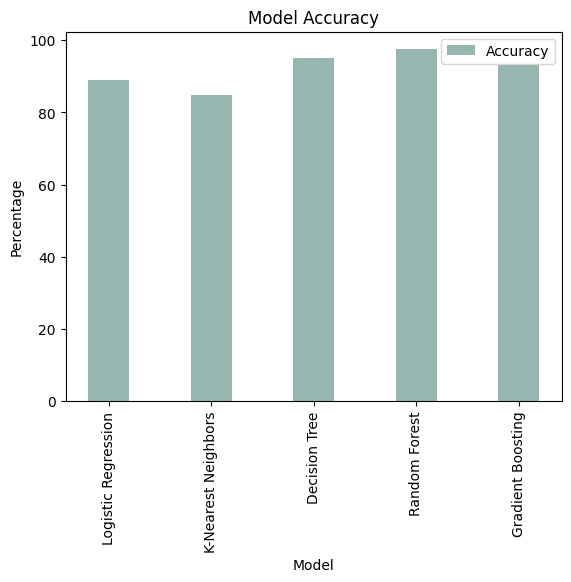

In [78]:
plt.bar(name, accu, label='Accuracy', color='#96b6af', width = 0.4)
plt.xlabel('Model')
plt.ylabel('Percentage')
plt.title('Model Accuracy')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# E R R O R

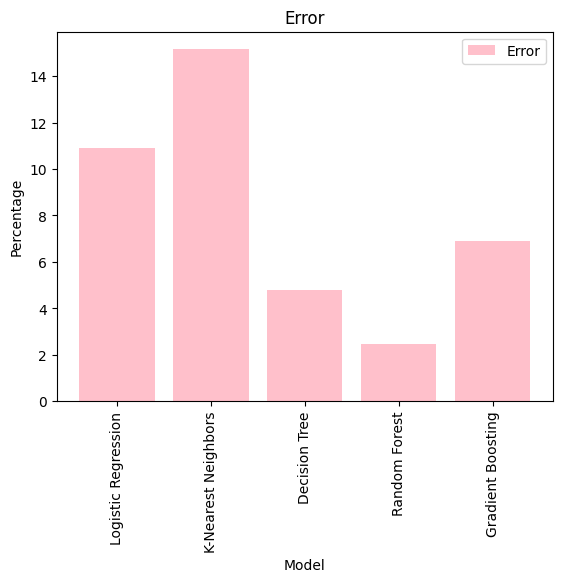

In [79]:
plt.bar(name, error , label='Error', color='pink')
plt.xlabel('Model')
plt.ylabel('Percentage')
plt.title('Error')
plt.xticks(rotation=90)
plt.legend()
plt.show()